# Camera capture

In [4]:
import cv2
import time


#相机参数设置
def Setcamera(cap):
    cap.set(6,cv2.VideoWriter.fourcc('M','J','P','G'))
    # cap.set(3,960)
    # cap.set(4,960)

fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

cap = cv2.VideoCapture(0)
Setcamera(cap)
# 每0.1S计算一次帧率
t = 0.1
counter = 0
fps = 0
frame_idx = 0
start_time = time.time()
while(True):
    ret, frame = cap.read()
    img = frame.copy()
    # time.sleep(0.05)  # Delay module
    #测帧率
    counter += 1
    if (time.time() - start_time) > t:
        fps = counter / (time.time() - start_time)
        fps = str(fps)
        counter = 0
        start_time = time.time()
    cv2.putText(frame, "FPS {0}" .format(fps), (10, 30), 1, 1.5, (255, 0, 255), 2)
    cv2.putText(frame, "FRAME {0}" .format(frame_idx), (10, 50), 1, 1.5, (255, 0, 255), 2)
    cv2.imshow('frame',frame)
    out.write(frame)
    frame_idx += 1
    if cv2.waitKey(1)&0xFF ==27:
        break

cap.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'copy'

In [ ]:
import os

if not os.path.exists('evals/clips/scissors/eval_instance001.txt'):
    print("create")

# Getting vid files

In [ ]:
import os
filePath = '/home/shixu/My_env/Dataset/clips/76scissors'
name_list = os.listdir(filePath)
name_list.sort()
source_list = []
for i in name_list:
    i = filePath + '/' + i
    source_list.append(i)
source_list

# Figure Drawing

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import palettable  #python颜色库


def read_file(path):
    seq = []
    for line in open(path):
        line=line.strip('\n')
        seq.append(float(line))
    seq = np.array(seq).reshape(-1, 1)
    return seq

object_list = os.listdir('evals')
object_list.sort()
print(object_list)
file_list = []
for object in object_list:
    file_list.append(str('evals/' + object + '/SP.txt'))

matrix = np.zeros(shape=(75,1))
for file in file_list:
    seq = read_file(file)
    matrix = np.column_stack((matrix,seq))
matrix = np.delete(matrix, 0, axis=1)
print(matrix.shape)
print(matrix[:][0])

['apple', 'banana', 'bottle', 'bowl', 'cup', 'fork', 'knife', 'orange', 'remote', 'scissors', 'spoon', 'wine glass']
(75, 12)
[-0.05985    -0.14113333 -0.021608   -0.05766667 -0.03643333  0.1031
 -0.12566667 -0.04618571 -0.19811667 -0.2102     -0.06583333 -0.18195   ]


In [2]:
def polarize(mat):
    tmp = mat.copy()
    tmp[tmp<=0] = -1
    tmp[tmp>0] = 1
    return tmp

matrix_polar = polarize(matrix)

Text(0.5, 1.0, 'Sequence Evaluation')

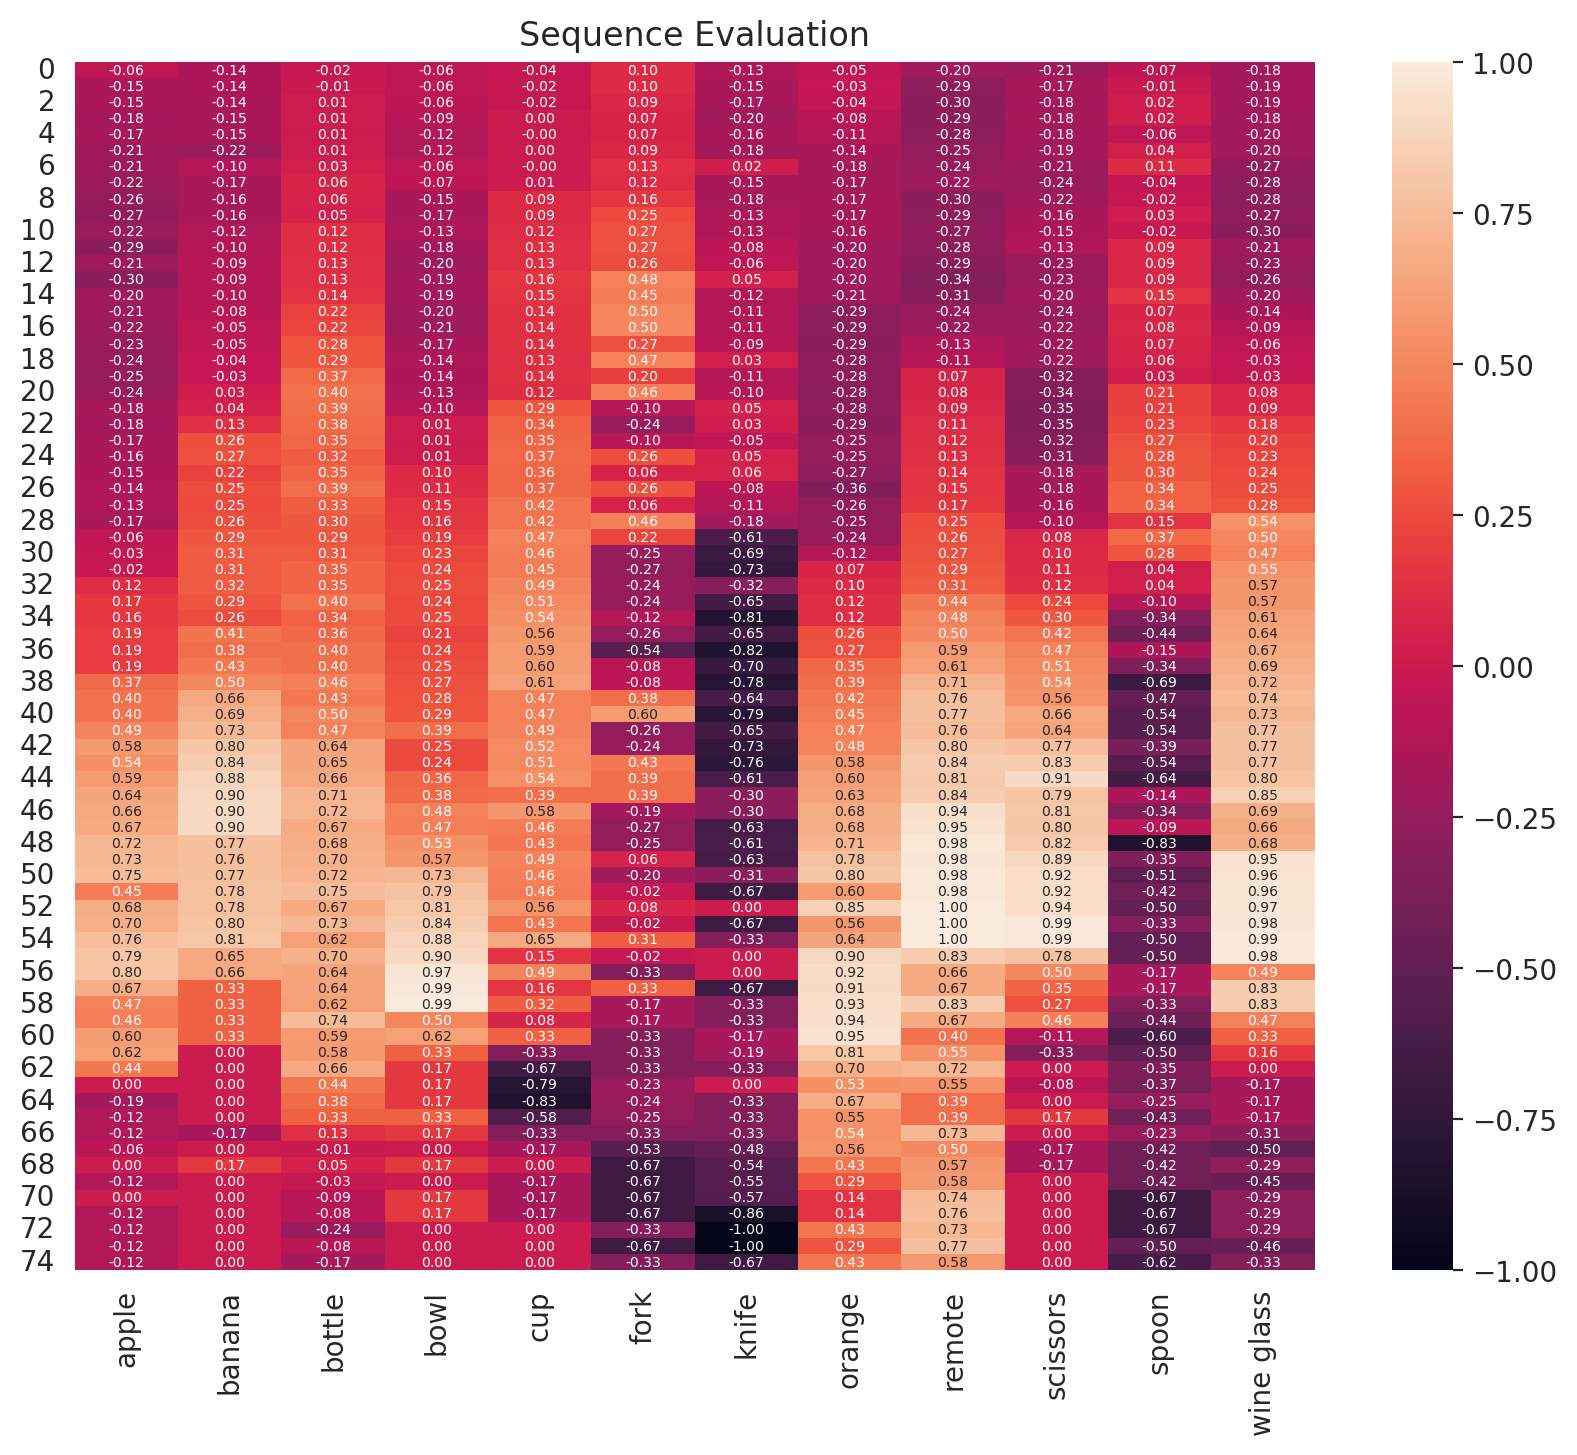

In [3]:
df = pd.DataFrame(matrix,
                  index=[str(i) for i in range(0, 75)],#DataFrame的行标签设置为大写字母
                  columns=object_list)#设置DataFrame的列标签
plt.figure(dpi=200, figsize=(10,8))
sns.heatmap(data=df,
            # cmap=sns.diverging_palette(10, 220, sep=80, n=10),#区分度显著色盘：sns.diverging_palette()使用
            annot=True, fmt=".2f", annot_kws={'size':5,'weight':'normal'},
           )
plt.title("Sequence Evaluation")

Text(0.5, 1.0, 'Sequence Evaluation')

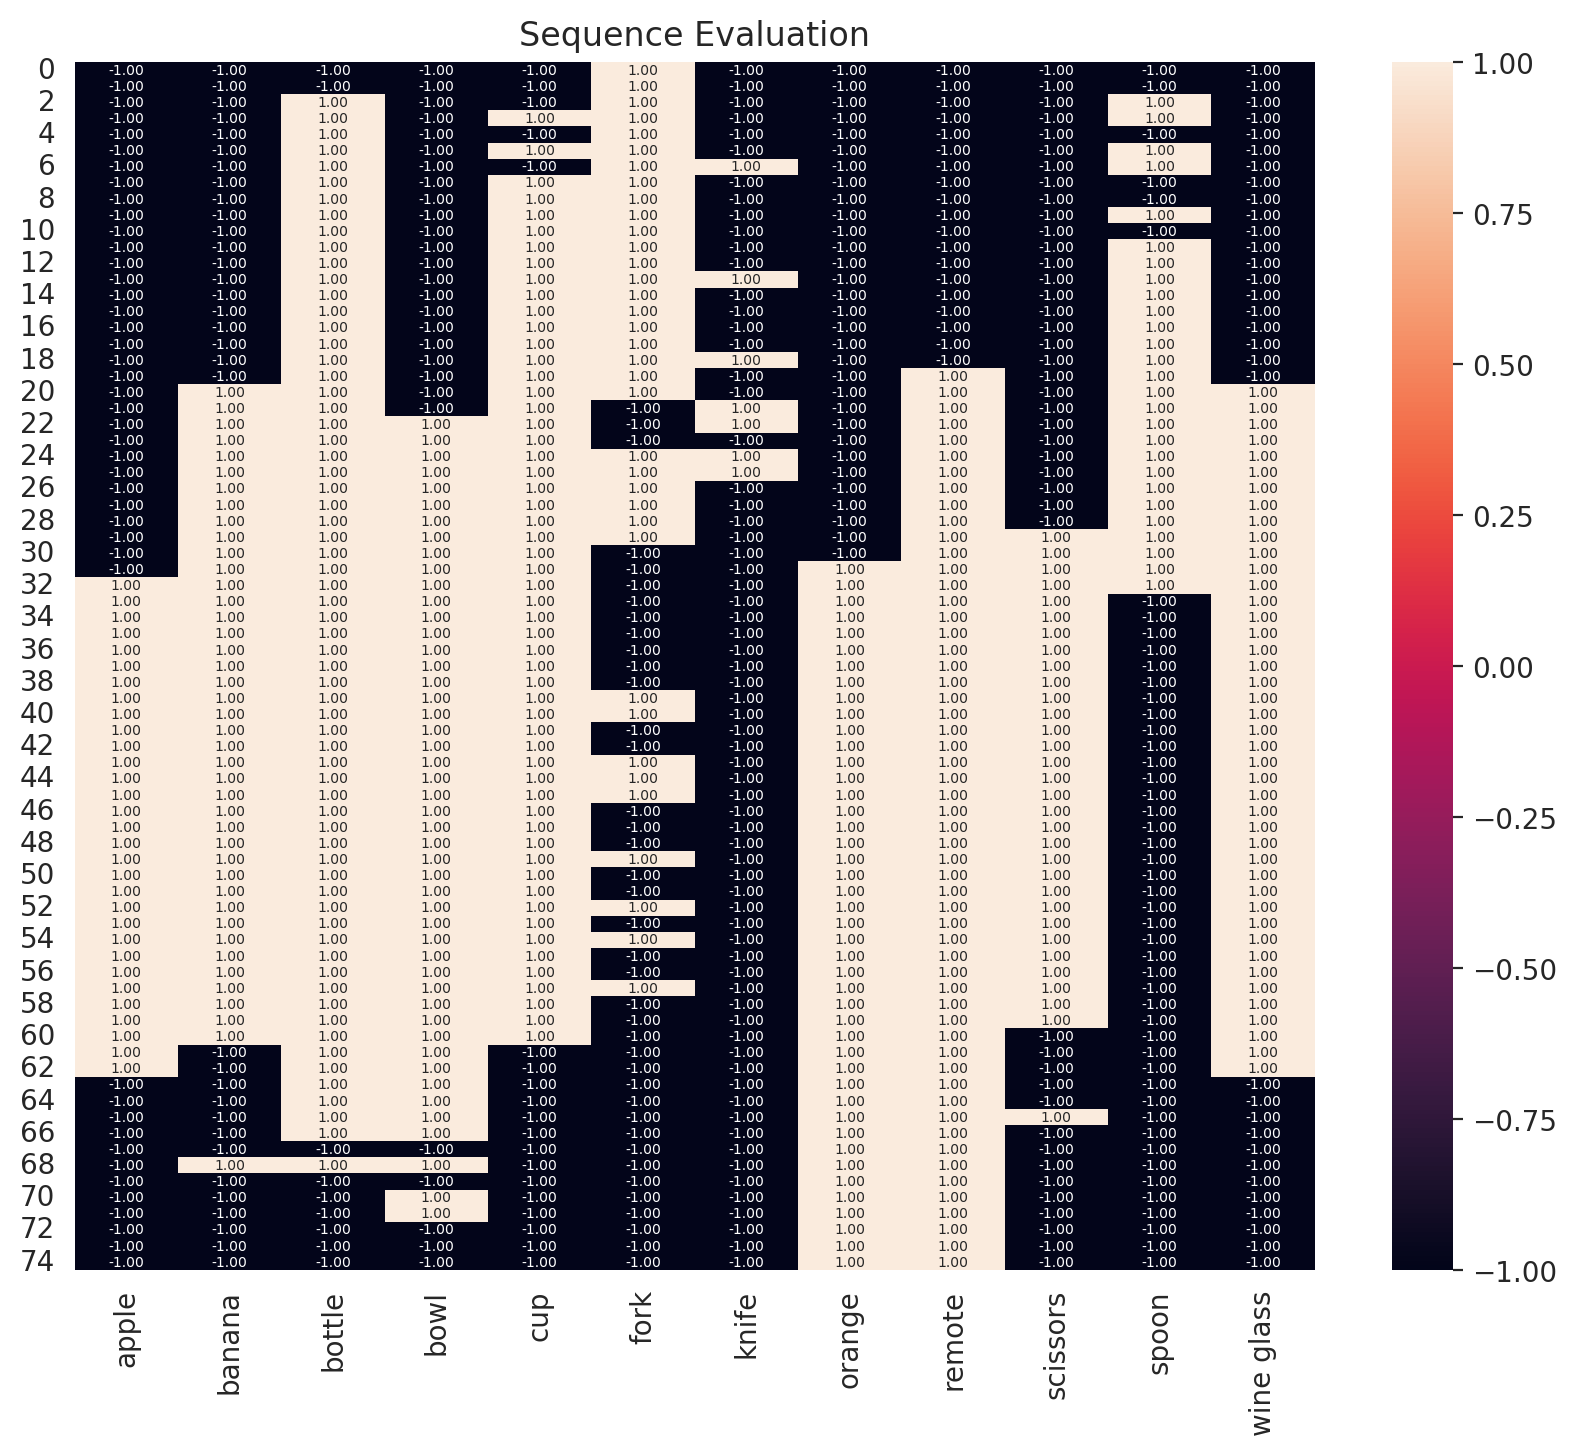

In [5]:
df = pd.DataFrame(matrix_polar,
                  index=[str(i) for i in range(0, 75)],#DataFrame的行标签设置为大写字母
                  columns=object_list)#设置DataFrame的列标签
plt.figure(dpi=200, figsize=(10,8))
sns.heatmap(data=df,
            # cmap=sns.diverging_palette(10, 220, sep=80, n=10),#区分度显著色盘：sns.diverging_palette()使用
            annot=True, fmt=".2f", annot_kws={'size':5,'weight':'normal'},
           )
plt.title("Sequence Evaluation")

# Rename files

In [13]:
import os


def batch_rename(path, begin_num):
    fileList = os.listdir(path)  # 获得所有文件名列表，可以print(fileList)查看
    fileList.sort()
    print(len(fileList))
    name_len = len(str(len(fileList))) + 1
    print('Total string length of the new names =', name_len)
    L = []
    for i in range(len(fileList) + 1):
        zfill = name_len -len(str(i))
        L.append('0' * zfill)
        L[i] += str(i)
    print(L)  # L is the list of latent new names
    idx = begin_num
    for filename in fileList:
        newname = L[idx + 1] + ".mp4"
        print(filename, "==>", newname)
        idx += 1
        os.rename(path + filename, path + newname)

folderList = os.listdir('/home/shixu/My_env/Dataset/object/')
for object in folderList:
    path = '/home/shixu/My_env/Dataset/object/' + str(object) + '/'
    batch_rename(path, 0)

26
Total string length of the new names = 3
['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026']
WIN_20220707_12_46_52_Pro.mp4 ==> 001.mp4
WIN_20220707_12_52_20_Pro.mp4 ==> 002.mp4
WIN_20220707_13_00_34_Pro.mp4 ==> 003.mp4
WIN_20220707_13_06_45_Pro.mp4 ==> 004.mp4
WIN_20220707_13_14_42_Pro.mp4 ==> 005.mp4
WIN_20220707_13_17_00_Pro.mp4 ==> 006.mp4
WIN_20220707_13_20_57_Pro.mp4 ==> 007.mp4
WIN_20220707_13_23_41_Pro.mp4 ==> 008.mp4
WIN_20220707_13_31_58_Pro.mp4 ==> 009.mp4
WIN_20220707_13_34_31_Pro.mp4 ==> 010.mp4
WIN_20220707_14_26_11_Pro.mp4 ==> 011.mp4
WIN_20220707_14_28_48_Pro.mp4 ==> 012.mp4
WIN_20220707_14_38_30_Pro.mp4 ==> 013.mp4
WIN_20220707_14_43_51_Pro.mp4 ==> 014.mp4
WIN_20220707_14_57_30_Pro.mp4 ==> 015.mp4
WIN_20220707_15_33_22_Pro.mp4 ==> 016.mp4
WIN_20220707_15_35_43_Pro.mp4 ==> 017.mp4
WIN_20220707_15_37_25_Pro.mp4 ==> 018.mp4
WIN_202207